Task 2. RNN
Develop RNN, GRU and LSTM to predict Usage_kWh. Dataset - http://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption.
Hyperparameters are at your discretion
Compare the quality of the MSE, RMSE and R^2 models

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, LSTM
import urllib.request

dataframe = pd.read_csv('Steel_industry_data.csv')
dataframe.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [18]:
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataframe = pd.read_csv('Steel_industry_data.csv',  parse_dates = ['date'], index_col=0, date_parser=parse)
dataframe = dataframe.drop('No', axis=1)
dataframe.head()

c:\Software\anaconda3\envs\NN\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


ValueError: time data '01/01/2018 00:15' does not match format '%Y %m %d %H'

<Figure size 640x480 with 0 Axes>

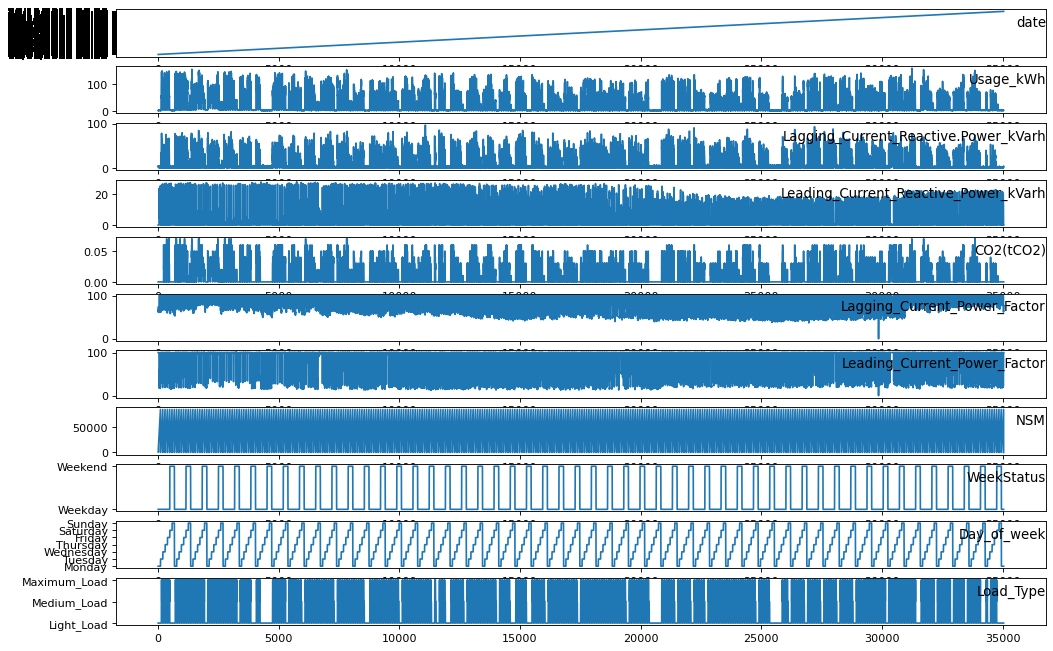

In [9]:
n_axes = dataframe.shape[1]
plt.figure()
plt.figure(figsize=(15, 10), dpi=80)
for i in range(n_axes):
    plt.subplot(n_axes, 1, i+1)
    plt.plot(dataframe.values[:, i])
    plt.title(dataframe.columns[i], y=0.5, loc='right')